PROVA 2 - INTELIGENCIA ARTIFICIAL

Elabore um único relatório com todos os procedimentos (Metodologia) e resultados obtidos (com discussão) de cada questão, associando o método aos resultados encontrados e sugerindo melhorias.

 

 

Classificação

 

1. Utilizando a base disponível em: https://www.kaggle.com/srinivas365/multilabel-classification-emotions elabore uma solução utilizando dois algoritmos de aprendizagem de máquina do seu conhecimento para classificar a emoção da música (escolha como você representará a saída, uma vez que algumas músicas podem pertencer a duas categorias). Justifique a escolha dos dois algoritmos de aprendizagem de maquina utilizados e discuta os resultados obtidos em ambos. Divida (aleatoriamente) o conjunto em treinamento e teste: 80% e 20%. Os resultados dessa questão deverão ser descritos detalhadamente no relatório através de três pontos principais:

- Análise da base de dados: identificar instancias com atributos incompletos, gerar matriz de correlação, identificar a presença de outliers e verificar se as classes estão balanceadas. O balanceamento devera ser ilustrado por meio de gráficos (e.g. histograma);

- Análise dos resultados considerando matriz de confusão, especificidade, sensibilidade, medida f1 e acurácia. Descreva detalhadamente os resultados obtidos por cada métrica,justificando a diferença entre eles.

Bônus: Altere dois parâmetros de cada algoritmo de aprendizagem de maquina utilizados na questão e discuta os resultados obtidos. Exemplo: alterar a quantidade de k vizinhos e a função de distancia utilizada, alterar a função kernel do SVM, alterar a arquitetura da rede neural (e.x. camadas e função de ativação, alterar o otimizador e a taxa de aprendizado).

In [65]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [66]:
%ls

emotions.arff       emotions-train.arff  missao5.ipynb           notebook.tex
emotions-test.arff  emotions.xml         missao5_solucao.ipynb*  ProvaIA.ipynb


In [90]:
#Abrindo arquivo XML
xtree = et.parse("emotions.xml")
xroot = xtree.getroot()

data = arff.loadarff('emotions.arff')
df = pd.DataFrame(data[0])

x = df.iloc[:, :72]
y = df.iloc[:, 72:]

In [91]:
df

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2.0,0.261742,0.002657,1.149211,b'0',b'0',b'1',b'1',b'1',b'0'
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2.0,0.282122,0.052218,0.335371,b'1',b'0',b'0',b'0',b'1',b'1'
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2.0,0.184313,0.247136,0.476993,b'0',b'0',b'1',b'1',b'1',b'0'
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2.0,0.547126,0.183494,1.255820,b'0',b'1',b'1',b'0',b'0',b'0'


## Análise da base de dados: identificar instancias com atributos incompletos, gerar matriz de correlação, identificar a presença de outliers e verificar se as classes estão balanceadas. O balanceamento devera ser ilustrado por meio de gráficos (e.g. histograma);

### Identificando se há instâncias com atributos duplicados

In [86]:
print('Valores duplicados:', df.duplicated())

Valores duplicados: 0      False
1      False
2      False
3      False
4      False
       ...  
588    False
589    False
590    False
591    False
592    False
Length: 593, dtype: bool


### Verificando quantidade de valores ausentes

In [87]:
print('Valores faltantes:', df.isnull().sum())

Valores faltantes: Mean_Acc1298_Mean_Mem40_Centroid    0
Mean_Acc1298_Mean_Mem40_Rolloff     0
Mean_Acc1298_Mean_Mem40_Flux        0
Mean_Acc1298_Mean_Mem40_MFCC_0      0
Mean_Acc1298_Mean_Mem40_MFCC_1      0
                                   ..
happy-pleased                       0
relaxing-calm                       0
quiet-still                         0
sad-lonely                          0
angry-aggresive                     0
Length: 78, dtype: int64


### Realizando Matriz de correlação 
    Verificamos que algumas colunas apresentam alto indice de correlação

In [89]:
#Matriz de correlaçao ()
corr = df.corr()
corr.style.background_gradient("BuPu")

### Tratando os outliers

Iremos estabelecer um limite superior e inferior, onde qualquer valor acima disso será considerado como uma anomalia.
O limite superior será definido pela média dos dados mais duas vezes o desvio padrão. 
Já o limite inferior será o valor da média menos duas vezes o valor do desvio padrão.

In [135]:
media = np.mean(x, axis = 0)
sd = np.std(x, axis = 0)

In [136]:
media

Mean_Acc1298_Mean_Mem40_Centroid      0.069309
Mean_Acc1298_Mean_Mem40_Rolloff       0.195399
Mean_Acc1298_Mean_Mem40_Flux          0.085695
Mean_Acc1298_Mean_Mem40_MFCC_0      -72.998228
Mean_Acc1298_Mean_Mem40_MFCC_1        4.979178
                                       ...    
BH_HighPeakBPM                      155.215852
BH_HighLowRatio                       2.099494
BHSUM1                                0.412940
BHSUM2                                0.354901
BHSUM3                                0.959906
Length: 72, dtype: float64

<IPython.core.display.Javascript object>


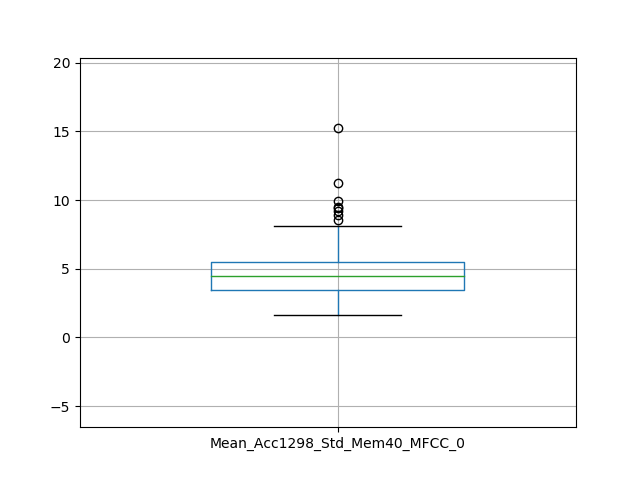

In [169]:
x.boxplot()

In [ ]:
detectado outlier na coluna 

Mean_Acc1298_Mean_Mem40_MFCC_0
Mean_Acc1298_Std_Mem40_MFCC_0
Std_Acc1298_Mean_Mem40_MFCC_0


In [176]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Mean_Acc1298_Mean_Mem40_Centroid     0.041509
Mean_Acc1298_Mean_Mem40_Rolloff      0.149926
Mean_Acc1298_Mean_Mem40_Flux         0.012305
Mean_Acc1298_Mean_Mem40_MFCC_0       8.785501
Mean_Acc1298_Mean_Mem40_MFCC_1       3.029524
                                      ...    
BH_HighPeakBPM                      48.000000
BH_HighLowRatio                      0.000000
BHSUM1                               0.350448
BHSUM2                               0.373169
BHSUM3                               0.728115
Length: 72, dtype: float64


In [178]:
a = (x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))

In [196]:
b = boston_df_out = x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
b

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,0.070075,0.041565,0.295031,70.0,0.276366,140.0,2.0,0.343547,0.276366,0.710924
5,0.052434,0.110653,0.096770,-69.792637,6.598383,1.258462,2.873985,0.503222,0.782427,-0.143505,...,0.110493,0.072176,0.218684,64.0,0.053870,128.0,2.0,0.403684,0.245910,0.649594
6,0.064067,0.147375,0.078124,-68.698041,4.052059,1.149220,2.063466,0.531396,0.877409,0.660980,...,0.094470,0.113727,0.167898,60.0,0.358269,120.0,2.0,0.755628,0.427281,1.182908
14,0.056384,0.114651,0.084246,-73.219315,4.801673,-0.160915,2.065888,0.517364,1.027248,0.660353,...,0.101346,0.124834,0.073747,55.0,0.055948,110.0,2.0,0.193052,0.169508,0.362560
20,0.090841,0.221729,0.083844,-62.038530,3.392900,0.122367,1.322220,0.259427,0.546771,0.591368,...,0.090094,0.075316,0.262349,90.0,0.416770,180.0,2.0,0.570178,0.195529,1.386673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0.093945,0.238842,0.079674,-60.907853,3.580037,-0.291600,1.221493,0.399308,0.453767,0.681751,...,0.068599,0.061131,0.067298,64.0,0.112037,128.0,2.0,0.439840,0.194852,0.702356
586,0.072010,0.138153,0.080729,-76.905956,6.479591,-0.897625,1.775038,0.095497,0.971582,0.299828,...,0.082232,0.081321,0.056584,64.0,0.151412,128.0,2.0,0.439126,0.254306,0.749563
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,0.129552,0.106260,0.089991,87.0,0.564842,174.0,2.0,0.261742,0.002657,1.149211
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,0.080006,0.058181,0.155650,84.0,0.276695,168.0,2.0,0.547126,0.183494,1.255820


In [166]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x))
print(np.where(z > 3))

(array([  0,   4,   4,   4,   9,  12,  12,  15,  17,  18,  23,  23,  23,
        27,  27,  27,  27,  27,  27,  27,  27,  27,  28,  28,  28,  28,
        28,  30,  30,  30,  30,  30,  30,  30,  39,  44,  44,  44,  44,
        44,  44,  44,  46,  48,  48,  48,  49,  54,  56,  58,  58,  59,
        59,  59,  59,  59,  59,  63,  63,  67,  71,  71,  72,  73,  74,
        74,  74,  78,  78,  78,  79,  81,  83,  83,  83,  83,  84,  85,
        85,  85,  85,  87,  87,  90,  90,  90,  91,  91,  91,  96,  96,
        97,  97,  97,  97,  97,  97,  99, 101, 101, 101, 101, 101, 101,
       101, 101, 101, 101, 104, 107, 107, 107, 107, 110, 111, 111, 115,
       117, 120, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124,
       124, 124, 127, 131, 131, 132, 134, 134, 134, 134, 134, 134, 134,
       136, 136, 136, 139, 145, 145, 146, 149, 149, 149, 149, 154, 156,
       158, 159, 160, 160, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 171, 172, 174, 177, 178, 178, 178, 178, 178, 179, 1

In [197]:
x

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.118630,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,0.070075,0.041565,0.295031,70.0,0.276366,140.0,2.0,0.343547,0.276366,0.710924
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,0.079917,0.085821,0.161574,61.0,0.000000,183.0,3.0,0.188693,0.045941,0.457372
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,0.129145,0.122330,0.043012,66.0,0.206562,132.0,2.0,0.102839,0.241934,0.351009
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,0.284196,0.189988,0.029308,100.0,0.144039,200.0,2.0,0.195196,0.310801,0.683817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,0.129552,0.106260,0.089991,87.0,0.564842,174.0,2.0,0.261742,0.002657,1.149211
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,0.128090,0.167160,0.035827,65.0,0.003942,130.0,2.0,0.282122,0.052218,0.335371
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,0.147194,0.098238,0.033681,88.0,0.000000,176.0,2.0,0.184313,0.247136,0.476993
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,0.080006,0.058181,0.155650,84.0,0.276695,168.0,2.0,0.547126,0.183494,1.255820


In [156]:
for j in range(72):
    print(x.loc[0].values[j])

0.034741
0.089665
0.091225
-73.302422
6.215179
0.615074
2.03716
0.804065
1.301409
0.558576
0.672063
0.783788
0.76664
0.458712
0.530384
0.812429
0.028851
0.129039
0.039614
5.762173
1.636819
1.170034
1.051511
0.764163
0.642705
0.617868
0.510265
0.566213
0.509149
0.477275
0.505073
0.463535
0.013519
0.050591
0.009025
8.156257
1.077167
0.624711
0.810244
0.399568
0.279947
0.314215
0.231439
0.345401
0.285389
0.210613
0.321896
0.290551
0.022774
0.095801
0.015057
4.748694
0.536378
0.296306
0.27321
0.1758
0.105508
0.168246
0.115849
0.13602
0.110514
0.100517
0.11863
0.094923
0.051035
68.0
0.014937
136.0
2.0
0.245457
0.105065
0.405399


593